In [ ]:
import pandas as pd

In [ ]:
# Read CSV into dataframes using Pandas

df = pd.read_csv("/content/project_used_cars/data_preparation/raw_data/train.csv")

# print first five rows
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5847 non-null   int64  
 1   Name               5847 non-null   object 
 2   Location           5847 non-null   object 
 3   Year               5847 non-null   int64  
 4   Kilometers_Driven  5847 non-null   int64  
 5   Fuel_Type          5847 non-null   object 
 6   Transmission       5847 non-null   object 
 7   Owner_Type         5847 non-null   object 
 8   Mileage            5845 non-null   object 
 9   Engine             5811 non-null   object 
 10  Power              5811 non-null   object 
 11  Seats              5809 non-null   float64
 12  New_Price          815 non-null    object 
 13  Price              5847 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 639.6+ KB


In [ ]:
# Check for missing values
missing_values = df.isnull()

# Count missing values in each column
missing_count = missing_values.sum()

missing_count

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5032
Price                   0
dtype: int64

<Axes: >

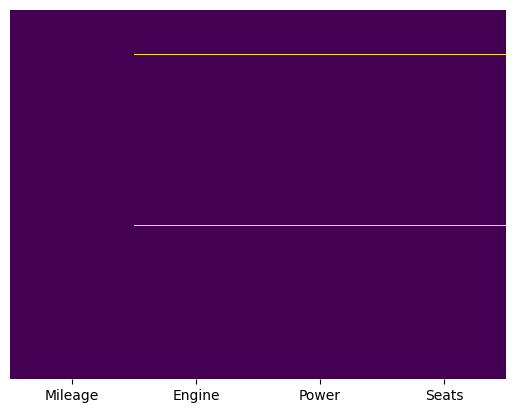

In [ ]:
import seaborn as sns

sns.heatmap(df[['Mileage','Engine','Power','Seats']].isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [ ]:
def remove_units_and_convert_to_float(series):
    # Extract numerical values with decimals from the string and convert to float
    return series.str.extract('(\d*\.?\d+|\d+)').astype(float)

def preprocess_data(df):
    # Remove units and convert to float for specified columns
    df['Mileage'] = remove_units_and_convert_to_float(df['Mileage'])
    df['Engine'] = remove_units_and_convert_to_float(df['Engine'])
    df['Power'] = remove_units_and_convert_to_float(df['Power'])
    df['New_Price'] = remove_units_and_convert_to_float(df['New_Price'])

    return df

df = preprocess_data(df)
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13.00,1199.0,88.70,5.0,8.61,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88,4.75
5843,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,NaN,4.00
5844,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,NaN,2.90
5845,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,NaN,2.65


In [ ]:
# Check for missing values for each column
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5032
Price                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5847 non-null   int64  
 1   Name               5847 non-null   object 
 2   Location           5847 non-null   object 
 3   Year               5847 non-null   int64  
 4   Kilometers_Driven  5847 non-null   int64  
 5   Fuel_Type          5847 non-null   object 
 6   Transmission       5847 non-null   object 
 7   Owner_Type         5847 non-null   object 
 8   Mileage            5845 non-null   float64
 9   Engine             5811 non-null   float64
 10  Power              5811 non-null   float64
 11  Seats              5809 non-null   float64
 12  New_Price          815 non-null    float64
 13  Price              5847 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 639.6+ KB


In [ ]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
count,5847.000000,5847.000000,5.847000e+03,5845.000000,5811.000000,5811.000000,5809.000000,815.000000,5847.000000
mean,3013.181461,2013.448435,5.841013e+04,18.158496,1631.552573,113.803144,5.286452,20.484564,9.653742
std,1736.398890,3.194949,9.237971e+04,4.358246,601.972587,53.896719,0.806668,20.248764,11.275966
min,1.000000,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,1.000000,0.440000
25%,1509.500000,2012.000000,3.346750e+04,15.260000,1198.000000,78.000000,5.000000,7.880000,3.550000
50%,3015.000000,2014.000000,5.257600e+04,18.190000,1497.000000,98.600000,5.000000,11.480000,5.750000
75%,4517.500000,2016.000000,7.249050e+04,21.100000,1991.000000,139.010000,5.000000,24.015000,10.250000
max,6018.000000,2019.000000,6.500000e+06,28.400000,5998.000000,560.000000,10.000000,99.920000,160.000000


In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[['Mileage', 'Engine', 'Power', 'Seats']] = imputer.fit_transform(df[['Mileage', 'Engine', 'Power', 'Seats']])

**Justification:**
To find the missing values of Mileage, Engine, Power, and Seats, I have used KNNImputer because it considers the similarity between samples to impute missing values, making it more context-aware. It uses the information from neighboring data points to estimate missing values, which can be beneficial when dealing with numerical features that might have some correlation.

In [ ]:
# Check for missing values in each column

df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5032
Price                   0
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
count,5847.000000,5847.000000,5.847000e+03,5847.000000,5847.000000,5847.000000,5847.000000,815.000000,5847.000000
mean,3013.181461,2013.448435,5.841013e+04,18.158562,1633.498546,113.908760,5.284385,20.484564,9.653742
std,1736.398890,3.194949,9.237971e+04,4.359452,603.082687,53.866185,0.805880,20.248764,11.275966
min,1.000000,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,1.000000,0.440000
25%,1509.500000,2012.000000,3.346750e+04,15.230000,1198.000000,78.000000,5.000000,7.880000,3.550000
50%,3015.000000,2014.000000,5.257600e+04,18.190000,1497.000000,98.600000,5.000000,11.480000,5.750000
75%,4517.500000,2016.000000,7.249050e+04,21.100000,1991.000000,140.000000,5.000000,24.015000,10.250000
max,6018.000000,2019.000000,6.500000e+06,28.400000,5998.000000,560.000000,10.000000,99.920000,160.000000


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Choose relevant features and target variable
features = ['Year', 'Mileage', 'Engine', 'Power', 'Seats']
target = 'New_Price'

# Separate data into two sets: one with known 'New_Price' values and one with missing values
df_known = df.dropna(subset=[target])
df_unknown = df[df[target].isnull()]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_known[features], df_known[target], test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the missing 'New_Price' values in the unknown set
new_price_predictions = model.predict(df_unknown[features])

# Round the predicted new car prices to 2 decimal places
rounded_prices = [round(price, 2) for price in new_price_predictions]

# Format the rounded prices as strings with 2 decimal places
formatted_prices = ["{:.2f}".format(price) for price in rounded_prices]


# Fill missing values in the DataFrame with the predicted values
df.loc[df[target].isnull(), target] = formatted_prices

# Evaluate the model performance (optional) on the known test set
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error on the test set: {mse_test}')

Mean Squared Error on the test set: 288.2164496727285


**Justification:**

I used modeling approach to address the missing values in the 'New_Price' column due to the sheer volume of missing entries, nearly matching the size of the dataset. Traditional imputation methods like mean, mode, or median weren't practical given the magnitude of missing data. Moreover, discarding rows with missing 'New_Price' values would result in significant data loss, which I aimed to avoid to maintain the dataset's integrity for a thorough analysis.

The chosen strategy involved training a linear regression model using instances where 'New_Price' is known. This approach ensures that the imputation process is grounded in the existing relationships between features and the target variable within the dataset. Subsequently, I used the trained model to predict 'New_Price' values for instances where they were missing, leveraging the learned patterns in the data for estimation.

To maintain consistency with the existing 'New_Price' values, I rounded and formatted the predicted values. This step was crucial to align the imputed values with the established format of the dataset. In essence, the modeling method served as a robust solution to tackle the challenge posed by a large number of missing values, allowing for a nuanced and informed imputation strategy that aligns with the broader analytical goals.

In [ ]:
df.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('/content/project_used_cars/data_preparation/cleaned_data/cleaned_data.csv', index=False)

new_df = pd.read_csv("/content/project_used_cars/data_preparation/cleaned_data/cleaned_data.csv")
new_df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,23.16,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13.00,1199.0,88.70,5.0,8.61,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,3.13,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,27.86,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,8.60,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88,4.75
5843,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,8.17,4.00
5844,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,13.11,2.90
5845,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,3.46,2.65


In [ ]:
new_df['Fuel_Type'].value_counts()

Diesel      3161
Petrol      2684
Electric       2
Name: Fuel_Type, dtype: int64

In [ ]:
new_df['Transmission'].value_counts()

Manual       4135
Automatic    1712
Name: Transmission, dtype: int64

In [ ]:
# Assuming 'Fuel_Type' and 'Transmission' are the categorical variables
df_encoded = pd.get_dummies(new_df, columns=['Fuel_Type', 'Transmission'])

# Display the DataFrame after one-hot encoding
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5847 non-null   int64  
 1   Name                    5847 non-null   object 
 2   Location                5847 non-null   object 
 3   Year                    5847 non-null   int64  
 4   Kilometers_Driven       5847 non-null   int64  
 5   Owner_Type              5847 non-null   object 
 6   Mileage                 5847 non-null   float64
 7   Engine                  5847 non-null   float64
 8   Power                   5847 non-null   float64
 9   Seats                   5847 non-null   float64
 10  New_Price               5847 non-null   float64
 11  Price                   5847 non-null   float64
 12  Fuel_Type_Diesel        5847 non-null   uint8  
 13  Fuel_Type_Electric      5847 non-null   uint8  
 14  Fuel_Type_Petrol        5847 non-null   

In [ ]:
df_encoded

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.67,1582.0,126.20,5.0,23.16,12.50,1,0,0,0,1
1,2,Honda Jazz V,Chennai,2011,46000,First,13.00,1199.0,88.70,5.0,8.61,4.50,0,0,1,0,1
2,3,Maruti Ertiga VDI,Chennai,2012,87000,First,20.77,1248.0,88.76,7.0,3.13,6.00,1,0,0,0,1
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,15.20,1968.0,140.80,5.0,27.86,17.74,1,0,0,1,0
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,First,23.08,1461.0,63.10,5.0,8.60,3.50,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,6014,Maruti Swift VDI,Delhi,2014,27365,First,28.40,1248.0,74.00,5.0,7.88,4.75,1,0,0,0,1
5843,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,First,24.40,1120.0,71.00,5.0,8.17,4.00,1,0,0,0,1
5844,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Second,14.00,2498.0,112.00,8.0,13.11,2.90,1,0,0,0,1
5845,6017,Maruti Wagon R VXI,Kolkata,2013,46000,First,18.90,998.0,67.10,5.0,3.46,2.65,0,0,1,0,1


In [ ]:
from datetime import datetime

# Assuming 'Year' is the column containing the manufacturing year of the car
new_df['Current_Year'] = datetime.now().year
new_df['Car_Age'] = new_df['Current_Year'] - new_df['Year']

# Drop the intermediate 'Current_Year' column if needed
new_df = new_df.drop('Current_Year', axis=1)
new_df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,23.16,12.50,9
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13.00,1199.0,88.70,5.0,8.61,4.50,13
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,3.13,6.00,12
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,27.86,17.74,11
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,8.60,3.50,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88,4.75,10
5843,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,8.17,4.00,9
5844,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,13.11,2.90,12
5845,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,3.46,2.65,11


In [ ]:
# Select operation
new_df1 = new_df[['Name', 'Year', 'Kilometers_Driven', 'Mileage', 'Fuel_Type', 'Transmission','Price',]]
new_df1

# Filter operation
new_df2 = new_df1[new_df1['Fuel_Type'] == 'Diesel']
new_df2

# Rename operation (Change the names )
new_df3 = new_df2.rename(columns={'Price':'Price (in Lakhs)'})
new_df3

# Mutate operation (Calculate Mileage per KM of each car)
new_df3['Mileage_per_KM'] = new_df3['Mileage'] / new_df3['Kilometers_Driven']
new_df3


# Arrange operation (Sort the data based on prices from ascending order)
new_df3 = new_df3.sort_values(by='Price (in Lakhs)')
new_df3

# Summarize operation (Calculate Average Price per Transmission)
Average_Price_per_Transmission = new_df.groupby('Transmission')['Price'].mean().reset_index()
Average_Price_per_Transmission

,Transmission,Price
0,Automatic,19.889182
1,Manual,5.415998
